# Deploying Granite Time series models in Amazon SageMaker

## Introduction to Granite Time Series Models

The Granite Time Series models are compact pre-trained models for Multivariate Time-Series Forecasting. With 1-3 million parameters, it introduces the notion of the first-ever tiny pre-trained models for time-series forecasting.

Granite Time Series Tiny Time Mixer (TTM) models supports multivariate forecasting via both channel independence and channel-mixing approaches. TTMs are lightweight and can be executed even on CPU-only machines, enhancing usability and fostering wider adoption in resource-constrained environments. Decoder Channel-Mixing can be enabled during fine-tuning for capturing strong channel-correlation patterns across time-series variates, a critical capability lacking in other existing approaches. In addition, TTM also supports exogenous and categorical data infusion.

IBM has released the Granite Time Series models to open source under the permissive Apache 2.0 license, enabling their use for both research and commercial purposes with no restrictions. The models are available on Amazon SageMaker JumpStart, the AWS Marketplace, and on [Hugging Face](https://huggingface.co/ibm-granite).

In this notebook, we will deploy the Granite Time Series models on Amazon SageMaker.

## Pre-requisites

- Before running this notebook, please make sure you got this notebook from the model catalog on SageMaker AWS Management Console.
- *Note*: Open this notebook from an Amazon SageMaker Notebook Instance or Amazon SageMaker Studio.
- Ensure that the IAM role used has **AmazonSageMakerFullAccess**.

## Contents

1. **Deploying Granite Time Series models in Amazon SageMaker**
    - To subscribe to the model package
    - Select the model package
2. **Create an endpoint and perform real-time inference**
    - Define the endpoint configuration
    - Create the endpoint
3. **Run inference with the model**
    - Example : Sample is given below in code.
4. **Clean-up**
    - Delete the endpoint
    - Delete the model    

## Usage Instructions

You can run this notebook one cell at a time by using **Shift+Enter** to run a cell.

## Deploying Granite Time Series models in Amazon SageMaker

### To subscribe to the model package:

1. Open the model package listing page [IBM Granite Time Series ](https://aws.amazon.com/marketplace/pp/prodview-az47mhw6aye2k?ref_=unifiedsearch)
2. On the AWS Marketplace listing, click on the Continue to subscribe button.
3. On the Subscribe to this software page, review and click on "Accept Offer" if you and your organization agrees with EULA, pricing, and support terms.
4. Once you click on Continue to configuration button and then choose a region, you will see a Product Arn displayed. This is the model package ARN that you need to specify while creating a deployable model using Boto3. Copy the ARN corresponding to your region and specify the same in the following cell.

### 1. Select the model package

Confirm that you received this notebook from model catalog on SageMaker AWS Management Console.

In [1]:
model_package_map = {
    "us-east-1": "arn:aws:sagemaker:us-east-1:865070037744:model-package/granite-ttl-8eb1a1cd94e13ae795348a3e2526d61f",
    "us-east-2": "arn:aws:sagemaker:us-east-2:057799348421:model-package/granite-ttl-8eb1a1cd94e13ae795348a3e2526d61f",
    "us-west-1": "arn:aws:sagemaker:us-west-1:382657785993:model-package/granite-ttl-8eb1a1cd94e13ae795348a3e2526d61f",
    "us-west-2": "arn:aws:sagemaker:us-west-2:594846645681:model-package/granite-ttl-8eb1a1cd94e13ae795348a3e2526d61f",
    "ca-central-1": "arn:aws:sagemaker:ca-central-1:470592106596:model-package/granite-ttl-8eb1a1cd94e13ae795348a3e2526d61f",
    "eu-central-1": "arn:aws:sagemaker:eu-central-1:446921602837:model-package/granite-ttl-8eb1a1cd94e13ae795348a3e2526d61f",
    "eu-west-1": "arn:aws:sagemaker:eu-west-1:985815980388:model-package/granite-ttl-8eb1a1cd94e13ae795348a3e2526d61f",
    "eu-west-2": "arn:aws:sagemaker:eu-west-2:856760150666:model-package/granite-ttl-8eb1a1cd94e13ae795348a3e2526d61f",
    "eu-west-3": "arn:aws:sagemaker:eu-west-3:843114510376:model-package/granite-ttl-8eb1a1cd94e13ae795348a3e2526d61f",
    "eu-north-1": "arn:aws:sagemaker:eu-north-1:136758871317:model-package/granite-ttl-8eb1a1cd94e13ae795348a3e2526d61f",
    "ap-southeast-1": "arn:aws:sagemaker:ap-southeast-1:192199979996:model-package/granite-ttl-8eb1a1cd94e13ae795348a3e2526d61f",
    "ap-southeast-2": "arn:aws:sagemaker:ap-southeast-2:666831318237:model-package/granite-ttl-8eb1a1cd94e13ae795348a3e2526d61f",
    "ap-northeast-2": "arn:aws:sagemaker:ap-northeast-2:745090734665:model-package/granite-ttl-8eb1a1cd94e13ae795348a3e2526d61f",
    "ap-northeast-1": "arn:aws:sagemaker:ap-northeast-1:977537786026:model-package/granite-ttl-8eb1a1cd94e13ae795348a3e2526d61f",
    "ap-south-1": "arn:aws:sagemaker:ap-south-1:077584701553:model-package/granite-ttl-8eb1a1cd94e13ae795348a3e2526d61f",
    "sa-east-1": "arn:aws:sagemaker:sa-east-1:270155090741:model-package/granite-ttl-8eb1a1cd94e13ae795348a3e2526d61f"
}

In [2]:
!pip install --upgrade pip
!pip install -U sagemaker -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.1.1 requires nvidia-ml-py3==7.352.0, which is not installed.
aiobotocore 2.13.3 requires botocore<1.34.163,>=1.34.70, but you have botocore 1.37.4 which is incompatible.
amazon-sagemaker-jupyter-ai-q-developer 1.0.14 requires jupyter-ai<3,>=2.26.0, but you have jupyter-ai 2.20.0 which is incompatible.
amazon-sagemaker-jupyter-ai-q-developer 1.0.14 requires jupyter-ai-magics<3,>=2.26.0, but you have jupyter-ai-magics 2.20.0 which is incompatible.
amazon-sagemaker-sql-magic 0.1.3 requires sqlparse==0.5.0, but you have sqlparse 0.5.1 which is incompatible.
autogluon-core 1.1.1 require

In [3]:
import json
import pprint
from datetime import datetime

import boto3
import sagemaker
from sagemaker import ModelPackage, get_execution_role

/opt/conda/lib/python3.11/site-packages/pydantic/_internal/_fields.py:200: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [4]:
sagemaker_session = sagemaker.Session()

try:
    execution_role_arn = sagemaker.get_execution_role()
except ValueError:
    execution_role_arn = None

if execution_role_arn == None:
    execution_role_arn = input("Enter your execution role ARN: ")

region = sagemaker_session.boto_region_name
runtime_sm_client = boto3.client("runtime.sagemaker")

print ("execution_role_arn: ", execution_role_arn)
print ("region: ", region)

execution_role_arn:  arn:aws:iam::481118440516:role/service-role/AmazonSageMaker-ExecutionRole-20241001T122412
region:  us-east-1


In [5]:
if region not in model_package_map.keys():
    raise "UNSUPPORTED REGION"

model_package_arn = model_package_map[region]

print ("model_package_arn: ", model_package_arn)

model_package_arn:  arn:aws:sagemaker:us-east-1:865070037744:model-package/granite-ttl-8eb1a1cd94e13ae795348a3e2526d61f


## Create an endpoint and perform real-time inference

In this example, we're deploying IBM  Granite Time Series on an Amazon SageMaker real-time endpoint hosted on a CPU instance. If you need general information on real-time inference with Amazon SageMaker, please refer to the SageMaker documentation.

For flexibility, you can pick from two sample configurations, depending your use case and the instances types available to you. Please make sure to run just one of the configuration cells below.

The endpoint configuration focuses on cost efficiency. It uses a ml.m5.2xlarge instance.


### 2. Define the endpoint configuration

In [10]:
model_name = "granite-ttl-v1-1"
inference_instance_type = "ml.m5.2xlarge"
model_download_timeout = 3600
health_check_timeout = 900
instance_count = 1

### 3. Create the endpoint

In [11]:
# create a deployable model from the model package.
model = ModelPackage(
    role=execution_role_arn, model_package_arn=model_package_arn, sagemaker_session=sagemaker_session
)

# create a unique endpoint name
timestamp = "{:%Y-%m-%d-%H-%M-%S}".format(datetime.now())
endpoint_name = f"{model_name}-{timestamp}"
print(f"Deploying endpoint {endpoint_name}")

Deploying endpoint granite-ttl-v1-1-2025-03-03-13-52-31


In [12]:
# deploy the model
deployed_model = model.deploy(
    initial_instance_count=instance_count,
    instance_type=inference_instance_type,
    endpoint_name=endpoint_name
)

[03/03/25 13:52:33] INFO     Creating model with name:                                              ]8;id=760879;file:///opt/conda/lib/python3.11/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=670007;file:///opt/conda/lib/python3.11/site-packages/sagemaker/session.py#4094\4094]8;;\
                             granite-ttl-8eb1a1cd94e13ae795348a3e252-2025-03-03-13-52-33-122                       

                    INFO     Creating endpoint-config with name                                     ]8;id=649610;file:///opt/conda/lib/python3.11/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=285706;file:///opt/conda/lib/python3.11/site-packages/sagemaker/session.py#5889\5889]8;;\
                             granite-ttl-v1-1-2025-03-03-13-52-31                                                  

[03/03/25 13:52:34] INFO     Creating endpoint with name granite-ttl-v1-1-2025-03-03-13-52-31       ]8;id=444381;file:///opt/conda/lib/python3.11/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=70363;file:///opt/conda/lib/python3.11/site-packages/sagemaker/session.py#4711\4711]8;;\

------!


If you have already deployed your model, you can also access it via your chosen endpoint_name and sagemaker_session:

In [13]:
deployed_model = sagemaker.Predictor(
    endpoint_name=endpoint_name,
    sagemaker_session=sagemaker_session,
)

SageMaker will now create our endpoint and deploy the model to it. This can takes a 10-15 minutes. Once the endpoint is in service, you will be able to perform real-time inference.

## Run inference with the model

Now that we have the Granite Time Series model loaded and deployed to a SageMaker endpoint, we can start testing. We use the predict method from the predictor to run inference on our endpoint. We can inference with different parameters to impact the generation. Parameters can be defined as in the parameters attribute of the payload.

### 4. This is an example model request. 

In this example, we want to test sample prompt.

In [14]:
from datetime import datetime

import pandas as pd


timestamp_column = "time"
target_columns = ["total load actual"]
context_length = 512


# Read in the data from the downloaded file.
input_df = pd.read_csv(
    "hf://datasets/vitaliy-sharandin/energy-consumption-hourly-spain/energy_dataset.csv",
    parse_dates=[timestamp_column],  # Parse the timestamp values as dates.
)

# Fill NA/NaN values by propagating the last valid value.
input_df = input_df.ffill()

# Only use the last `context_length` rows for prediction.
input_df = input_df.iloc[-context_length:,]

# Show the last few rows of the dataset.
input_df.tail()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89
35063,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88


[03/03/25 13:58:13] INFO     generated new fontManager                                         ]8;id=897506;file:///opt/conda/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=131531;file:///opt/conda/lib/python3.11/site-packages/matplotlib/font_manager.py#1584\1584]8;;\

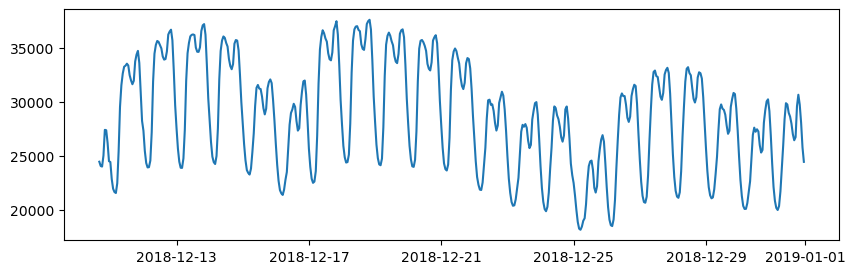

In [15]:
! pip install -q matplotlib
import matplotlib.pyplot as plt


fig, axs = plt.subplots(len(target_columns), 1, figsize=(10, 3 * len(target_columns)), squeeze=False)
for ax, target_column in zip(axs, target_columns):
    ax[0].plot(input_df[timestamp_column], input_df[target_column])

In [16]:
import copy


original_input_df = copy.deepcopy(input_df)

input_df[timestamp_column] = input_df[timestamp_column].apply(lambda x: x.isoformat())

payload = {
    "inference_type": "forecasting",  # we currently support only 'forecasting'
    "model_id": "ttm-r2",
    "parameters": {},
    "schema": {
        "timestamp_column": timestamp_column,
        "id_columns": [],  # single timeseries doesn't require id_columns
        "target_columns": target_columns,  # what we're generating a forecast for
    },
    "data": input_df.to_dict(orient="list"),
    "future_data": {},  # used for things like exogenous data
}

In [18]:
response = deployed_model.predict(
    data=json.dumps(payload),
    initial_args={"Accept": "application/json", "ContentType": "application/json"},
).decode("utf-8")

In [19]:
print(response)

{"model_id":"ttm-r2","created_at":"2025-03-03T14:00:07.368973","results":[{"time":["2019-01-01T00:00:00+01:00","2019-01-01T01:00:00+01:00","2019-01-01T02:00:00+01:00","2019-01-01T03:00:00+01:00","2019-01-01T04:00:00+01:00","2019-01-01T05:00:00+01:00","2019-01-01T06:00:00+01:00","2019-01-01T07:00:00+01:00","2019-01-01T08:00:00+01:00","2019-01-01T09:00:00+01:00","2019-01-01T10:00:00+01:00","2019-01-01T11:00:00+01:00","2019-01-01T12:00:00+01:00","2019-01-01T13:00:00+01:00","2019-01-01T14:00:00+01:00","2019-01-01T15:00:00+01:00","2019-01-01T16:00:00+01:00","2019-01-01T17:00:00+01:00","2019-01-01T18:00:00+01:00","2019-01-01T19:00:00+01:00","2019-01-01T20:00:00+01:00","2019-01-01T21:00:00+01:00","2019-01-01T22:00:00+01:00","2019-01-01T23:00:00+01:00","2019-01-02T00:00:00+01:00","2019-01-02T01:00:00+01:00","2019-01-02T02:00:00+01:00","2019-01-02T03:00:00+01:00","2019-01-02T04:00:00+01:00","2019-01-02T05:00:00+01:00","2019-01-02T06:00:00+01:00","2019-01-02T07:00:00+01:00","2019-01-02T08:00:00+

## Clean-up

Please don't forget to run the cells below to delete all resources and avoid unecessary charges.

### 7. Delete the endpoint

In [20]:
model.sagemaker_session.delete_endpoint(endpoint_name)
model.sagemaker_session.delete_endpoint_config(endpoint_name)

[03/03/25 14:01:44] INFO     Deleting endpoint with name: granite-ttl-v1-1-2025-03-03-13-52-31      ]8;id=362044;file:///opt/conda/lib/python3.11/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=151416;file:///opt/conda/lib/python3.11/site-packages/sagemaker/session.py#4855\4855]8;;\

[03/03/25 14:01:45] INFO     Deleting endpoint configuration with name:                             ]8;id=825995;file:///opt/conda/lib/python3.11/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=581383;file:///opt/conda/lib/python3.11/site-packages/sagemaker/session.py#4865\4865]8;;\
                             granite-ttl-v1-1-2025-03-03-13-52-31                                                  

### 8. Delete the model

In [21]:
model.delete_model()

[03/03/25 14:01:46] INFO     Deleting model with name:                                              ]8;id=362675;file:///opt/conda/lib/python3.11/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=735794;file:///opt/conda/lib/python3.11/site-packages/sagemaker/session.py#5226\5226]8;;\
                             granite-ttl-8eb1a1cd94e13ae795348a3e252-2025-03-03-13-52-33-122                       

Thank you for trying out IBM Granite Time series on SageMaker. We have only scratched the surface of what you can do with this model.

Welcome to your IBM Granite Model support experience! You can view, start, or contribute to community discussions (sign in to contribute). View supplemental resources and  [sign](https://www.ibm.com/mysupport/s/?language=en_US) in to open a new case.

## Would you like to provide feedback?

Please let us know your comments about our family of Granite Time Series models by visiting our collection. Select the repository of the model you would like to provide feedback about. Then, go to Community tab, and click on New discussion. Alternatively, you can also post any questions/comments on our github discussions page.